In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("pets_disease_dataset.csv")

In [3]:
data.shape

(431, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Animal    431 non-null    object
 1   Symptom1  431 non-null    object
 2   Symptom2  431 non-null    object
 3   Symptom3  430 non-null    object
 4   Symptom4  430 non-null    object
 5   Disease   431 non-null    object
dtypes: object(6)
memory usage: 20.3+ KB


In [5]:
data.describe().T

,count,unique,top,freq
Animal,431,3,dog,205
Symptom1,431,52,weight loss,57
Symptom2,431,53,dehydration,35
Symptom3,430,51,weight loss,32
Symptom4,430,53,diarrhea,38
Disease,431,50,roundworms,30


<Axes: >

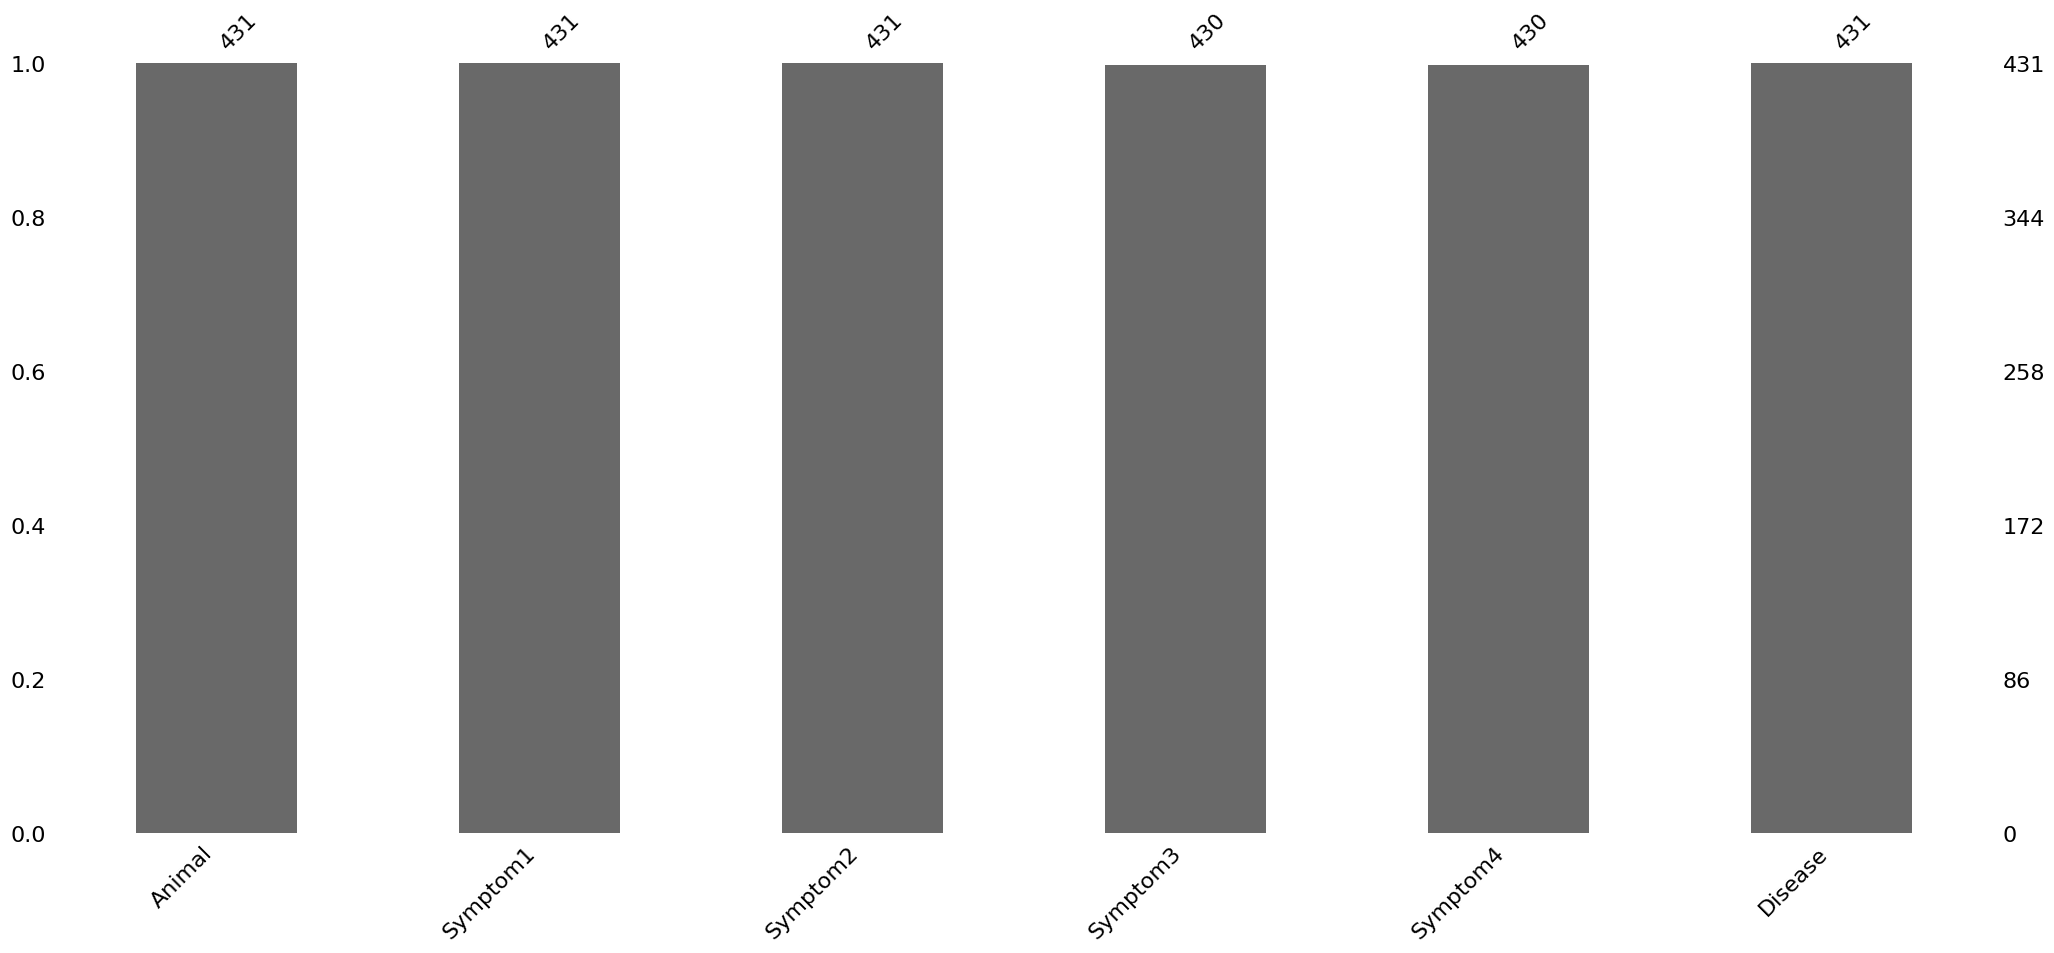

In [6]:
#Check for missing values
import missingno as msno
msno.bar(data)

In [7]:
data = data.dropna()

In [8]:
#all animals
all_animals = data['Animal'].unique()
print(f'{all_animals} \n number of animals = {len(all_animals)}')

# Unique Diseases
all_disease = data['Disease'].unique()
print(f'{all_disease}\n number of diseases = {len(all_disease)}')

['cat' 'dog' 'parrot'] 
 number of animals = 3
['diabetes' 'arthritis' 'roundworms' 'aspergillosis' 'candidiasis'
 'brucellosis' 'plague' 'spondylosis' 'rabies' 'feline herpesvirus'
 'kidney diesease' 'parvo' 'E. coli' 'mycoplasma synoviae'
 'vestibular disorder' 'cataracts' 'hot spots' 'feline leukemia virus'
 'sprain' 'pacheco' 'avian pox' 'tularemia' 'liver shunt' 'ear mites'
 'asthma' 'psittacosis' 'cat scratch disease' 'giardiasis '
 'campylobacteriosis' 'hookworm' 'cat hookworm' 'giardiasis'
 'polyomavirus' 'poisoning' 'liver disease' 'avian mycobacteriosis'
 'clostridium' 'stomach flu' 'kennel cough'
 'psittacine beak and feather disease' 'new castle disease' 'whipworm'
 'cancer' 'pyoderma' 'hyperthyroidism' 'stomach infection' 'hip dysplasia'
 'leptospirosis' 'carnassial tooth']
 number of diseases = 49


In [9]:
#Unique Symptoms
def unique_symptoms():
    symptom_features = ['Symptom1','Symptom2','Symptom3', 'Symptom4']
    for i in symptom_features:
        symptoms = data[i].unique()
        print(f' {i} = {np.sort(symptoms)}\n\n Total = {len(symptoms)} \n')
    
        
unique_symptoms()

def are_symptoms_same():
    Symptop_1 = np.sort(data['Symptom1'].unique())
    Symptop_2 = np.sort(data['Symptom2'].unique())
    Symptop_3 = np.sort(data['Symptom3'].unique())
    Symptom_4 = np.sort(data['Symptom4'].unique())
    print("Are equal?")
    return np.array_equal(Symptop_1,Symptop_2) and np.array_equal(Symptop_1,Symptop_3) and np.array_equal(Symptom_1,Symptom_4)

are_symptoms_same()

def combined_unique_symptoms():
    all_symptoms = pd.concat([data['Symptom1'], data['Symptom2'], data['Symptom3'], data['Symptom4']])
    unique_symptoms = np.sort(all_symptoms.unique())
    print(f'Combined unique symptoms: {unique_symptoms}\n\nTotal unique symptoms: {len(unique_symptoms)}')

combined_unique_symptoms()



 Symptom1 = ['abdominal pain' 'anemia' 'back pain' 'bleeding' 'blood in stool' 'cough'
 'decolored eyes' 'dehydration' 'depression' 'diarrhea'
 'difficulty breathing' 'difficulty exercising' 'discharge' 'dizziness'
 'drooling' 'dry coat' 'enlarged lymph nodes' 'fatigue' 'fever'
 'fluffed feathers' 'greasy stools' 'growth on body' 'hair loss'
 'increased appetite' 'increased thirst' 'increased urination' 'infection'
 'infertility' 'inflammation in eye' 'inflection in reproductive organ'
 'limping' 'loss of appetite' 'motion sickness' 'nausea' 'pacing' 'pain'
 'paralysis' 'pot-bellied appearance' 'rough coat' 'runny nose'
 'scratching' 'seizures' 'sneezing' 'swelling' 'swolen joint'
 'unable to jump up' 'undigested food' 'vomiting' 'watery eyes' 'weakness'
 'weight loss' 'wheezing']

 Total = 52 

 Symptom2 = ['abdominal pain' 'anemia' 'back pain' 'bleeding' 'blood in stool' 'cough'
 'decolored eyes' 'dehydration' 'depression' 'diarrhea'
 'difficulty breathing' 'difficulty exercising' 'd

In [10]:
# Combine unique values from all symptom columns
all_symptoms = pd.concat([data['Symptom1'], data['Symptom2'], data['Symptom3'], data['Symptom4']])
unique_symptoms = all_symptoms.unique()

# Print combined unique values
print("Unique symptoms across all columns:", unique_symptoms)


Unique symptoms across all columns: ['weight loss' 'unable to jump up' 'diarrhea' 'watery eyes'
 'fluffed feathers' 'infertility' 'loss of appetite' 'abdominal pain'
 'back pain' 'runny nose' 'weakness' 'inflammation in eye' 'cough' 'fever'
 'depression' 'dehydration' 'fatigue' 'paralysis' 'vomiting' 'bleeding'
 'seizures' 'pain' 'pacing' 'dizziness' 'hair loss' 'difficulty breathing'
 'increased urination' 'rough coat' 'infection'
 'inflection in reproductive organ' 'pot-bellied appearance' 'discharge'
 'swelling' 'swolen joint' 'increased thirst' 'motion sickness'
 'enlarged lymph nodes' 'nausea' 'anemia' 'dry coat' 'drooling'
 'greasy stools' 'limping' 'wheezing' 'undigested food' 'sneezing'
 'difficulty exercising' 'scratching' 'blood in stool'
 'increased appetite' 'decolored eyes' 'growth on body' 'shaking'
 'sleeplessness' 'excessive hunger']


In [11]:
# Copy dataframe(dataset)
df = data.copy()
df.head(10)

,Animal,Symptom1,Symptom2,Symptom3,Symptom4,Disease
0,cat,weight loss,increased thirst,increased urination,dehydration,diabetes
1,dog,unable to jump up,difficulty exercising,limping,fatigue,arthritis
2,dog,diarrhea,dehydration,pot-bellied appearance,rough coat,roundworms
3,parrot,watery eyes,sneezing,fatigue,runny nose,aspergillosis
4,parrot,fluffed feathers,weakness,loss of appetite,vomiting,candidiasis
5,dog,infertility,inflammation in eye,inflection in reproductive organ,infection,brucellosis
6,cat,loss of appetite,enlarged lymph nodes,fever,weakness,plague
7,cat,abdominal pain,fever,loss of appetite,fatigue,plague
8,dog,back pain,diarrhea,loss of appetite,vomiting,spondylosis
9,parrot,runny nose,watery eyes,sneezing,fatigue,aspergillosis


In [12]:
#Lable Encoding Diseases
def label_encode_columns(data,columns):
    lb = LabelEncoder()
    for column in columns:
        data[column] = lb.fit_transform(data[column])
    return data

col_to_encode = ['Animal','Disease']

df= label_encode_columns(df, col_to_encode)

df.head(10)

,Animal,Symptom1,Symptom2,Symptom3,Symptom4,Disease
0,0,weight loss,increased thirst,increased urination,dehydration,15
1,1,unable to jump up,difficulty exercising,limping,fatigue,1
2,1,diarrhea,dehydration,pot-bellied appearance,rough coat,41
3,2,watery eyes,sneezing,fatigue,runny nose,2
4,2,fluffed feathers,weakness,loss of appetite,vomiting,9
5,1,infertility,inflammation in eye,inflection in reproductive organ,infection,6
6,0,loss of appetite,enlarged lymph nodes,fever,weakness,34
7,0,abdominal pain,fever,loss of appetite,fatigue,34
8,1,back pain,diarrhea,loss of appetite,vomiting,42
9,2,runny nose,watery eyes,sneezing,fatigue,2


In [13]:
# Create columns for each unique symptom and initialize them to 0
for symptom in unique_symptoms:
    df[symptom] = 0

# Update the new columns based on the symptoms in Symptom1, Symptom2, Symptom3, and Symptom4
for index, row in df.iterrows():
    for symptom_column in ['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4']:
        symptom = row[symptom_column]
        if pd.notna(symptom):  # Check if symptom is not NaN
            df.loc[index, symptom] = 1

df.head(10)

,Animal,Symptom1,Symptom2,Symptom3,Symptom4,Disease,weight loss,unable to jump up,diarrhea,watery eyes,...,sneezing,difficulty exercising,scratching,blood in stool,increased appetite,decolored eyes,growth on body,shaking,sleeplessness,excessive hunger
0,0,weight loss,increased thirst,increased urination,dehydration,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,unable to jump up,difficulty exercising,limping,fatigue,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,diarrhea,dehydration,pot-bellied appearance,rough coat,41,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,watery eyes,sneezing,fatigue,runny nose,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,fluffed feathers,weakness,loss of appetite,vomiting,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,infertility,inflammation in eye,inflection in reproductive organ,infection,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,loss of appetite,enlarged lymph nodes,fever,weakness,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,abdominal pain,fever,loss of appetite,fatigue,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,back pain,diarrhea,loss of appetite,vomiting,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2,runny nose,watery eyes,sneezing,fatigue,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [14]:
#Remove redundant colums
df.drop(['Symptom1','Symptom2','Symptom3', 'Symptom4'], axis=1, inplace=True)

#Make diseae the last column
cols = list(df.columns)
cols.remove('Disease')
cols.append('Disease')
df = df[cols]

In [15]:
#train test split
X = df.drop("Disease", axis=1)
Y = df['Disease']
X_test,X_train,y_test,y_train = train_test_split(X, Y, test_size=0.2, random_state=12)

In [16]:
#Random forest
RForest = RandomForestClassifier(n_estimators = 100)
RForest.fit(X_train, y_train)
y_pred = RForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 87.5


In [17]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 88.0813953488372


In [18]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}")

Accuracy: 85.46511627906976


In [19]:
import joblib
joblib.dump(lr, 'pets.pkl')
joblib.dump(LabelEncoder().fit(data['Disease']), 'pets_label_encoder.pkl')

['pets_label_encoder.pkl']